In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objs as go
import warnings
from textblob import TextBlob
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [ ]:
from pandas import read_csv

df = read_csv("/content/drive/MyDrive/KTDL&UD/country_wise_latest.csv")

df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df.tail()
# tail()phương thức này để xem một số hàng cuối cùng của DataFrame

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
df.info

<bound method DataFrame.info of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Rec

In [ ]:
df.shape

(187, 15)

In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
#cho phép kiểm tra xem dữ liệu có chứa giá trị null hay không
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

**Thay thế tên cột**

In [ ]:
df.rename(columns={'Country/Region':'Country','New cases':'New_cases','New deaths':'New_deaths','New recovered':'New_recovered','Deaths / 100 Cases':'Deaths_100_Cases','Recovered / 100 Cases':'Recovered_100_Cases','Confirmed last week':'Confirmed_last_week','1 week change':'1_week_change','1 week_%_increase':'1_week_%_increase','WHO Region':'WHO_Region'}, inplace = True)
df.head()

,Country,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_100_Cases,Recovered_100_Cases,Deaths / 100 Recovered,Confirmed_last_week,1_week_change,1 week % increase,WHO_Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


**Cho phép thực hiện phân tích dữ liệu thăm dò**

In [ ]:
# Sắp xếp cột Confirmed(đã xác nhận) theo thứ tự giảm dần
top_confirmed_case = df.sort_values("Confirmed", ascending = False)

# Chọn 10 hàng và cột trên cùng mà chúng ta quan tâm
top_confirmed_case = top_confirmed_case[["Country", "Confirmed", "WHO_Region"]].head(10)
top_confirmed_case

,Country,Confirmed,WHO_Region
173,US,4290259,Americas
23,Brazil,2442375,Americas
79,India,1480073,South-East Asia
138,Russia,816680,Europe
154,South Africa,452529,Africa
111,Mexico,395489,Americas
132,Peru,389717,Americas
35,Chile,347923,Americas
177,United Kingdom,301708,Europe
81,Iran,293606,Eastern Mediterranean


**1.Top 10 quốc gia được xác nhận nhiễm Covid trong khu vực của WHO**

Text(0.5, 1.0, 'Top-10_Confirmed')

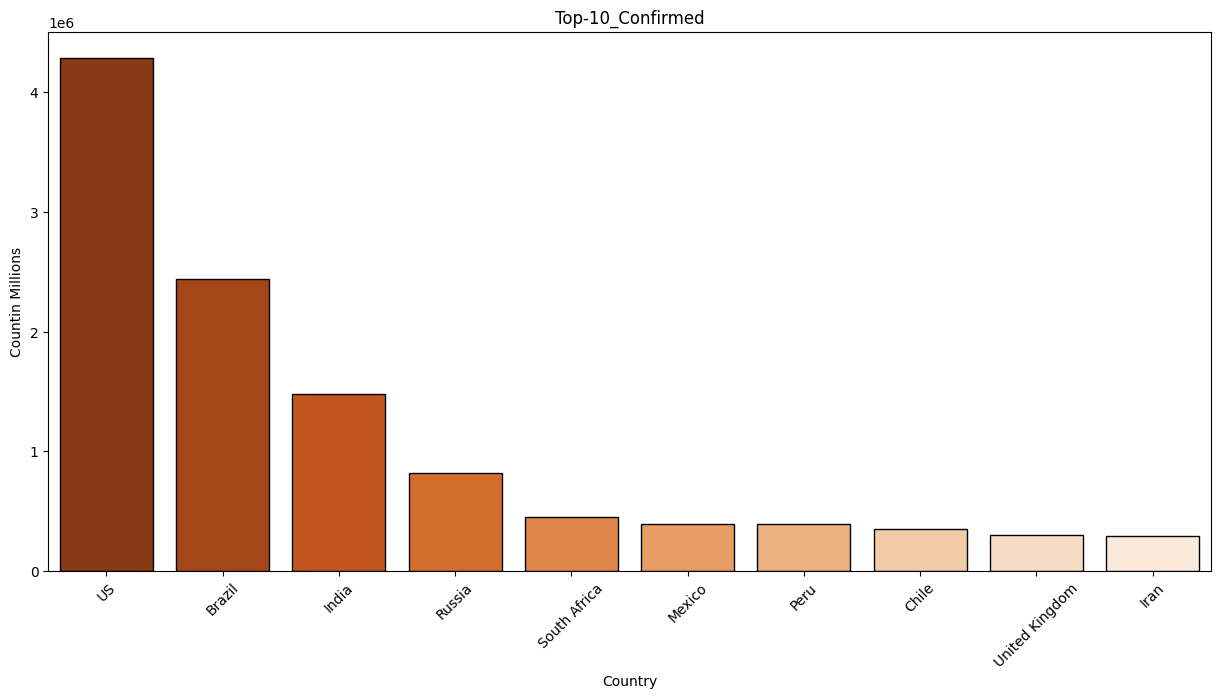

In [ ]:
plt.figure(figsize = (15,7))

# sns.barplot được sử dụng để tạo một biểu đồ thanh.
sns.barplot(x = top_confirmed_case["Country"], y = top_confirmed_case["Confirmed"], data = top_confirmed_case, palette = "Oranges_r", edgecolor = "Black")

# xoay nhãn trục x trong biểu đồ thanh 45 độ để dễ đọc hơn.
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Countin Millions")
plt.title("Top-10_Confirmed")

**Trong danh sách 10 Hoa Kỳ đứng đầu về số ca được xác nhận nhiễm bệnh và Khu vực của WHO là Châu Mỹ**

**2. Chúng ta hãy cùng xem xét 10 quốc gia được xác nhận có Covid thấp nhất trong khu vực của WHO**

In [ ]:
bottom_confirmed_case = df.sort_values("Confirmed", ascending = False)

bottom_confirmed_case = bottom_confirmed_case[["Country", "Confirmed", "WHO_Region"]].tail(10)
bottom_confirmed_case

,Country,Confirmed,WHO_Region
59,Fiji,27,Western Pacific
141,Saint Lucia,24,Americas
168,Timor-Leste,24,South-East Asia
69,Grenada,23,Americas
94,Laos,20,Western Pacific
49,Dominica,18,Americas
140,Saint Kitts and Nevis,17,Americas
68,Greenland,14,Europe
75,Holy See,12,Europe
183,Western Sahara,10,Africa


Text(0.5, 1.0, 'Bottom-10_Confirmed')

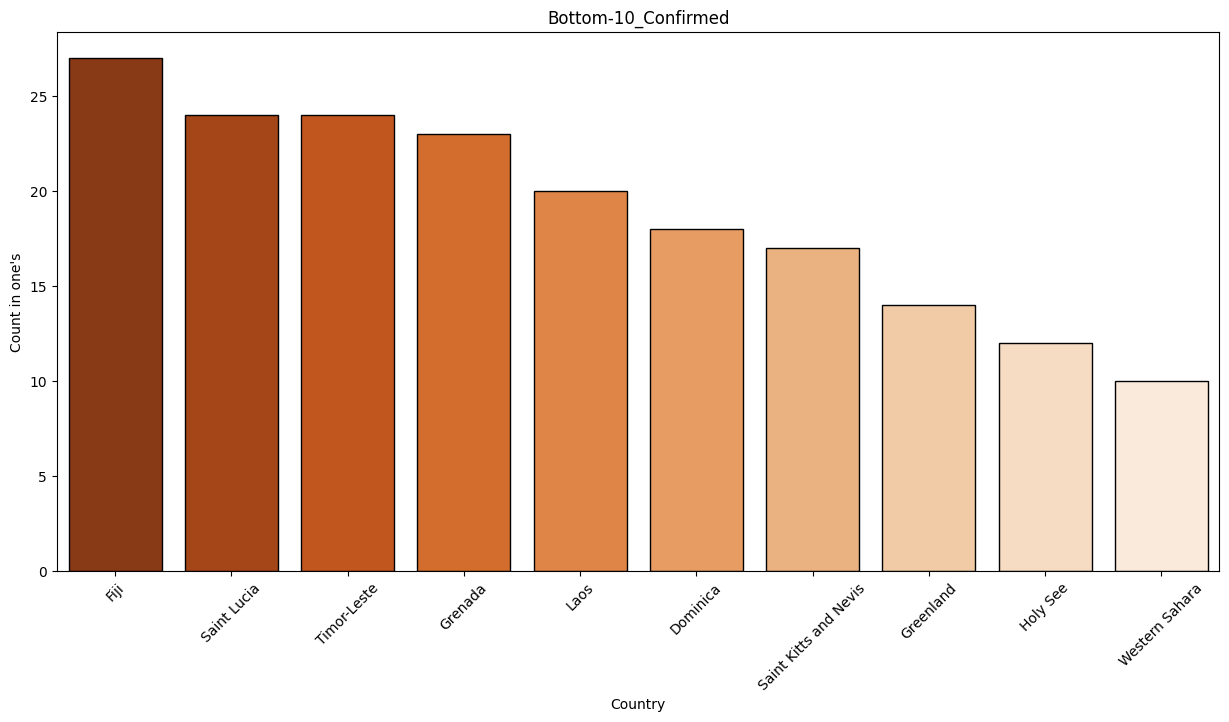

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(x = bottom_confirmed_case["Country"], y = bottom_confirmed_case["Confirmed"], data = bottom_confirmed_case, palette = "Oranges_r", edgecolor = "Black")
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Count in one's")
plt.title("Bottom-10_Confirmed")

**3. Chúng ta hãy cùng điểm qua 10 quốc gia có số ca tử vong hàng đầu do Covid trong khu vực của WHO**

In [ ]:
top_deaths_case = df.sort_values("Deaths", ascending = False)

top_deaths_case = top_deaths_case[["Country", "Deaths", "WHO_Region"]].head(10)
top_deaths_case

,Country,Deaths,WHO_Region
173,US,148011,Americas
23,Brazil,87618,Americas
177,United Kingdom,45844,Europe
111,Mexico,44022,Americas
85,Italy,35112,Europe
79,India,33408,South-East Asia
61,France,30212,Europe
157,Spain,28432,Europe
132,Peru,18418,Americas
81,Iran,15912,Eastern Mediterranean


Text(0.5, 1.0, 'Top-10_Deaths')

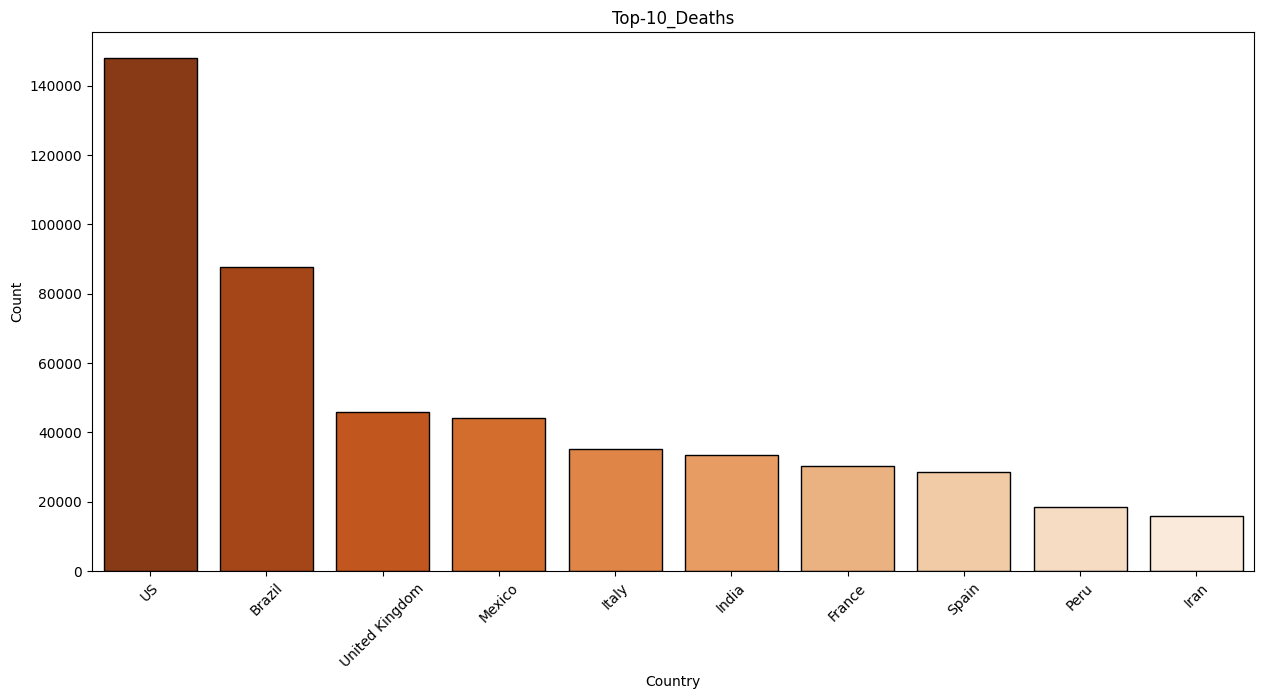

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = top_deaths_case["Country"], y = top_deaths_case["Deaths"], data = top_deaths_case, palette = "Oranges_r", edgecolor = "Black")
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top-10_Deaths")

**4. Chúng ta hãy cùng điểm qua 10 quốc gia có số ca tử vong thấp nhất do Covid trong khu vực của WHO**

In [ ]:
bottom_deaths_case = df.sort_values("Confirmed", ascending = False)

bottom_deaths_case = bottom_deaths_case[["Country", "Deaths", "WHO_Region"]].tail(10)
bottom_deaths_case

,Country,Deaths,WHO_Region
59,Fiji,0,Western Pacific
141,Saint Lucia,0,Americas
168,Timor-Leste,0,South-East Asia
69,Grenada,0,Americas
94,Laos,0,Western Pacific
49,Dominica,0,Americas
140,Saint Kitts and Nevis,0,Americas
68,Greenland,0,Europe
75,Holy See,0,Europe
183,Western Sahara,1,Africa


Text(0.5, 1.0, 'Bottom-10_Confirmed')

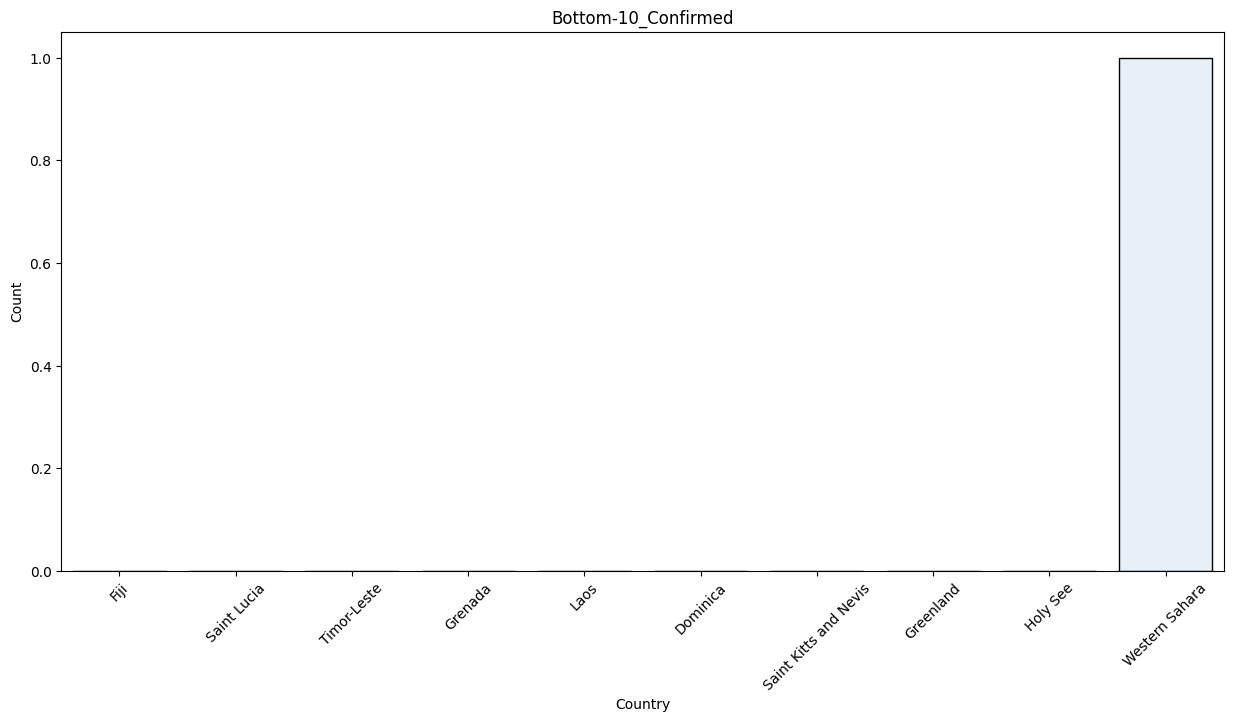

In [ ]:
plt.figure(figsize = (15, 7))
sns.barplot(x = bottom_deaths_case["Country"], y = bottom_deaths_case["Deaths"], data = bottom_deaths_case, palette="Blues_r", edgecolor = "Black")
plt.xticks(rotation= 45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Bottom-10_Confirmed")

**5. Chúng ta hãy cùng điểm qua 10 quốc gia đã phục hồi tốt nhất trong khu vực WHO**

In [ ]:
top_recovered_case = df.sort_values("Recovered", ascending = False)

top_recovered_case = top_recovered_case[["Country", "Recovered", "WHO_Region"]].head(10)
top_recovered_case

,Country,Recovered,WHO_Region
23,Brazil,1846641,Americas
173,US,1325804,Americas
79,India,951166,South-East Asia
138,Russia,602249,Europe
35,Chile,319954,Americas
111,Mexico,303810,Americas
154,South Africa,274925,Africa
132,Peru,272547,Americas
81,Iran,255144,Eastern Mediterranean
128,Pakistan,241026,Eastern Mediterranean


Text(0.5, 1.0, 'Top-10_Recovered')

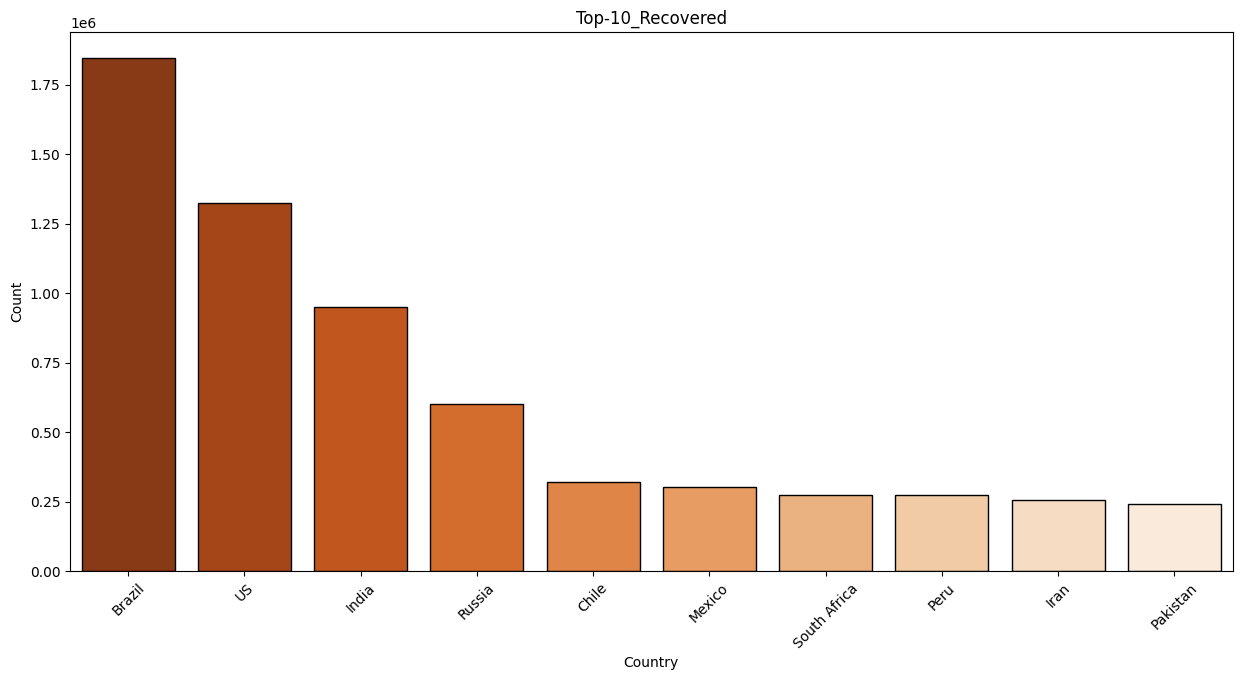

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(x = top_recovered_case["Country"], y = top_recovered_case["Recovered"], data = top_recovered_case, palette = "Oranges_r", edgecolor = "Black")
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top-10_Recovered")

**6. Chúng ta hãy cùng điểm qua 10 quốc gia phục hồi thấp nhất trong khu vực WHO**

In [ ]:
bottom_recovered_case = df.sort_values("Recovered", ascending = False)

bottom_recovered_case = bottom_recovered_case[["Country", "Recovered", "WHO_Region"]].tail(10)
bottom_recovered_case

,Country,Recovered,WHO_Region
68,Greenland,13,Europe
75,Holy See,12,Europe
130,Papua New Guinea,11,Western Pacific
183,Western Sahara,8,Africa
117,Mozambique,0,Africa
32,Canada,0,Americas
168,Timor-Leste,0,South-East Asia
147,Serbia,0,Europe
163,Syria,0,Eastern Mediterranean
161,Sweden,0,Europe


Text(0.5, 1.0, 'Bottom-10_Recovered')

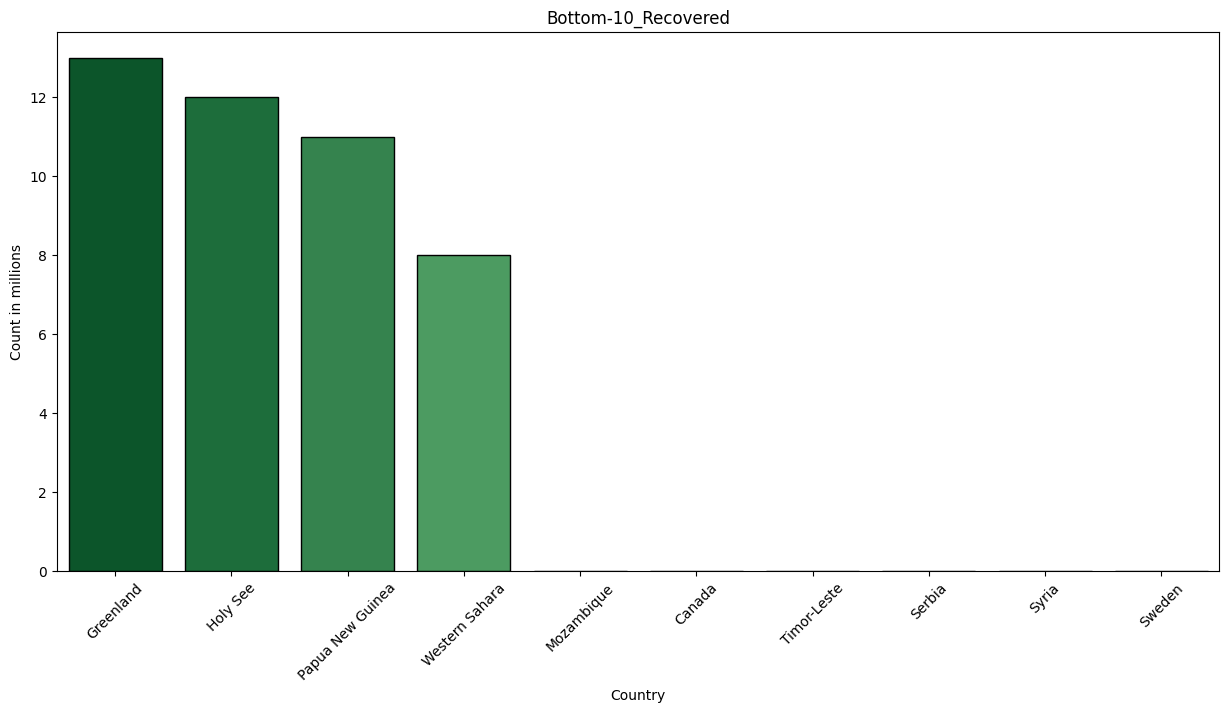

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = bottom_recovered_case["Country"], y = bottom_recovered_case["Recovered"], data = bottom_recovered_case, palette = "Greens_r", edgecolor = "Black")
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Count in millions")
plt.title("Bottom-10_Recovered")

In [ ]:
#Kiểm tra số lượng quốc gia
df.Country.nunique()

187

In [ ]:
#Kiểm tra số lượng khu vực của WHO
df.WHO_Region.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [ ]:
#Kiểm tra số lượng quốc gia trong một khu vực
count = df.WHO_Region.value_counts()
count

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO_Region, dtype: int64

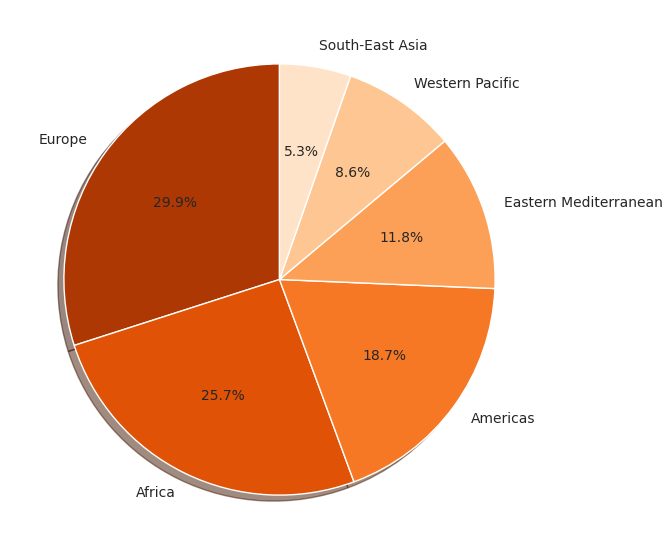

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style("white")
color=sns.color_palette("Oranges_r")
plt.pie(count,labels=count.index,autopct="%0.1f%%",shadow=True,colors=color,startangle=90);